<a href="https://colab.research.google.com/github/Rwaan-001/projectRepo/blob/main/01_dataPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_1samp, skew, kurtosis

In [20]:
import pandas as pd

DATA_PATH = "/content/shopping_behavior_NEW.csv"
df = pd.read_csv(DATA_PATH)

TARGET = "Purchase Amount (USD)"
NUM_IV = "Age"                 # numerical IV for Pearson/Spearman
CAT_IV = "Discount Applied"    # categorical IV for Chi-square

df = df.copy()
if df[TARGET].isna().any():
    df = df.dropna(subset=[TARGET])  # drop rows missing the target

display(df.head())

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,840,48,Male,Shirt,Clothing,31,Illinois,L,Teal,Spring,2.6,Yes,Free Shipping,Yes,Yes,10,Debit Card,Every 3 Months
1,1718,29,Male,Hoodie,Clothing,50,Hawaii,L,Orange,Summer,2.9,No,Express,No,No,16,Debit Card,Bi-Weekly
2,322,41,Male,Sneakers,Footwear,36,Vermont,L,Orange,Summer,4.7,Yes,Free Shipping,Yes,Yes,48,Debit Card,Quarterly
3,3188,67,Female,Blouse,Clothing,72,Texas,L,Indigo,Winter,3.2,No,Free Shipping,No,No,28,Debit Card,Weekly
4,2270,49,Male,Skirt,Clothing,38,Kentucky,M,Yellow,Fall,4.4,No,Store Pickup,No,No,27,Credit Card,Annually


# **TASK** 2: Q2 Create a function for Descriptive Statistics

In [21]:
print("Unique values in 'Category' column:")
print(df['Category'].unique())

Unique values in 'Category' column:
['Clothing' 'Footwear' 'Outerwear' 'Accessories']


In [22]:
#(TASK2) Q2:

# Function for descriptive statistics
def descriptive_stats(data, field):
    """Function to calculate descriptive statistics for a given column."""
    s = pd.to_numeric(data[field], errors='coerce').dropna()

    stats = {
        "Count": s.count(),
        "Mean": s.mean(),
        "Median": s.median(),
        "Mode": s.mode().iloc[0] if not s.mode().empty else np.nan,
        "Minimum": s.min(),
        "Maximum": s.max(),
        "Range": s.max() - s.min(),
        "Standard Deviation": s.std(),
        "Variance": s.var(),
        "Skewness": s.skew(),
        "Kurtosis": s.kurt(),
        "25th Percentile": s.quantile(0.25),
        "50th Percentile": s.quantile(0.50),
        "75th Percentile": s.quantile(0.75),
        "Interquartile Range": s.quantile(0.75) - s.quantile(0.25)
    }

    return stats

# Example: apply the function to the dependent variable
results = descriptive_stats(df, "Purchase Amount (USD)")
print("Descriptive Statistics for 'Purchase Amount (USD)':\n")
for k, v in results.items():
    print(f"{k}: {v:.2f}" if isinstance(v, (int, float, np.floating)) else f"{k}: {v}")

Descriptive Statistics for 'Purchase Amount (USD)':

Count: 1000
Mean: 58.68
Median: 58.00
Mode: 25
Minimum: 20.00
Maximum: 100.00
Range: 80.00
Standard Deviation: 23.48
Variance: 551.44
Skewness: 0.07
Kurtosis: -1.26
25th Percentile: 37.75
50th Percentile: 58.00
75th Percentile: 79.25
Interquartile Range: 41.50


# **TASK 2: Q3**

In [28]:
# (TASK 2) Q3: sample 150 rows and apply the function from Q2
import pandas as pd

from pathlib import Path
csv_path = Path("/content/shopping_behavior_NEW.csv") # used the original file that has big data since question asked for 150 as sample size

# 1) Load data
df = pd.read_csv(csv_path)

# 2) Choose dependent variable (change if needed)
dep_var = "Purchase Amount (USD)"

# 3) Take a random sample of size 150 (reproducible)
# Check if sample size is larger than the population
sample_size = 150
if sample_size > len(df):
    print(f"Warning: Sample size ({sample_size}) is larger than the total number of rows ({len(df)}). Sampling the entire dataset.")
    sample_size = len(df)

sample_150 = df.sample(n=sample_size, replace=False, random_state=42)


print(f"Original rows: {len(df)}")
print(f"Sample rows:   {len(sample_150)}")

# 4) Apply the Task-2 function to the SAMPLE (not the full df)
from math import isnan  # optional, if you want to check mode
# Re-define the descriptive_stats function if it's not available in the current session
def descriptive_stats(data, field):
    """Function to calculate descriptive statistics for a given column."""
    s = pd.to_numeric(data[field], errors='coerce').dropna()

    stats = {
        "Count": s.count(),
        "Mean": s.mean(),
        "Median": s.median(),
        "Mode": s.mode().iloc[0] if not s.mode().empty else np.nan,
        "Minimum": s.min(),
        "Maximum": s.max(),
        "Range": s.max() - s.min(),
        "Standard Deviation": s.std(),
        "Variance": s.var(),
        "Skewness": s.skew(),
        "Kurtosis": s.kurt(),
        "25th Percentile": s.quantile(0.25),
        "50th Percentile": s.quantile(0.50),
        "75th Percentile": s.quantile(0.75),
        "Interquartile Range": s.quantile(0.75) - s.quantile(0.25)
    }

    return stats

stats_150 = descriptive_stats(sample_150, dep_var)

# 5) Show results
print(f"\nDescriptive statistics for SAMPLE (n={sample_size}) — '{dep_var}':")
for k, v in stats_150.items():
    print(f"{k}: {v}")

Original rows: 1000
Sample rows:   150

Descriptive statistics for SAMPLE (n=150) — 'Purchase Amount (USD)':
Count: 150
Mean: 58.92
Median: 59.0
Mode: 77
Minimum: 20
Maximum: 99
Range: 79
Standard Deviation: 24.35214803860143
Variance: 593.0271140939595
Skewness: 0.03896146591212162
Kurtosis: -1.3076867224090112
25th Percentile: 37.0
50th Percentile: 59.0
75th Percentile: 79.0
Interquartile Range: 42.0


# **TASK 2: Q4**

In [4]:
import numpy as np
import pandas as pd
import os

def descriptive_stats(data, field):
    """
    Function to calculate descriptive statistics for a given column.
    This definition is included here to ensure it's available in the cell's scope.
    """
    s = pd.to_numeric(data[field], errors='coerce').dropna()

    stats = {
        "Count": s.count(),
        "Mean": s.mean(),
        "Median": s.median(),
        "Mode": s.mode().iloc[0] if not s.mode().empty else np.nan,
        "Minimum": s.min(),
        "Maximum": s.max(),
        "Range": s.max() - s.min(),
        "Standard Deviation": s.std(),
        "Variance": s.var(),
        "Skewness": s.skew(),
        "Kurtosis": s.kurt(),
        "25th Percentile": s.quantile(0.25),
        "50th Percentile": s.quantile(0.50),
        "75th Percentile": s.quantile(0.75),
        "Interquartile Range": s.quantile(0.75) - s.quantile(0.25)
    }

    return stats

def systematic_sampling(data, step, start=0):
    """
    Systematic sampling function
    Condition: Select every kth record starting from specified position
    """
    indices = np.arange(start, len(data), step)
    return data.iloc[indices]

# Load the dataframe
file_path = "/content/shopping_behavior_NEW.csv"

if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the 'shopping_behavior_NEW.csv' file is uploaded to your Colab environment in the /content/ directory.")
else:
    df = pd.read_csv(file_path)

    # Apply systematic sampling with conditions
    step = 15        # Condition 1: Select every 15th record
    start_pos = 3    # Condition 2: Start from the 4th record (index 3)

    systematic_sample = systematic_sampling(df, step, start_pos)

    print("SYSTEMATIC SAMPLING WITH CONDITIONS")
    print(f"Condition 1: Select every {step}th record")
    print(f"Condition 2: Start from position {start_pos + 1} (index {start_pos})")
    print(f"Original dataset size: {len(df)}")
    print(f"Systematic sample size: {len(systematic_sample)}")

    # Apply descriptive function to dependent variable
    dependent_variable = 'Purchase Amount (USD)'
    systematic_stats = descriptive_stats(systematic_sample, dependent_variable)

    print(f"\nDESCRIPTIVE STATISTICS FOR DEPENDENT VARIABLE: {dependent_variable}")
    # Iterate through the dictionary and print the values
    for k, v in systematic_stats.items():
        if isinstance(v, (int, float, np.floating)):
             print(f"{k}: {v:.2f}")
        else:
            print(f"{k}: {v}")

Error: The file '/content/shopping_behavior_NEW.csv' was not found.
Please ensure the 'shopping_behavior_NEW.csv' file is uploaded to your Colab environment in the /content/ directory.


(TASK 2) Q5: create a detailed descripitve statitsics report about the dependent variable of the chosen dataset.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Choose dependent variable (edit if yours is different)
dep_var = "Purchase Amount (USD)"

In [ ]:
# Choose dependent variable (edit if yours is different)
dep_var = "Purchase Amount (USD)"

desc = df[dep_var].describe()
extra = {
    "variance": df[dep_var].var(ddof=1),
    "skewness": df[dep_var].skew(),
    "kurtosis": df[dep_var].kurt()
}
print("Descriptive Statistics for", dep_var)
print(desc)
print(extra)

Descriptive Statistics for Purchase Amount (USD)
count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64
{'variance': 560.9978060778241, 'skewness': np.float64(0.012701757626433795), 'kurtosis': np.float64(-1.236593691266159)}


# **(TASK 2) Q6: visulaize the dependent variable by the graph/chart of the following using python program:**

A. Scatter Plot

B. Box Plot

C. Histogram

D. Heat Map

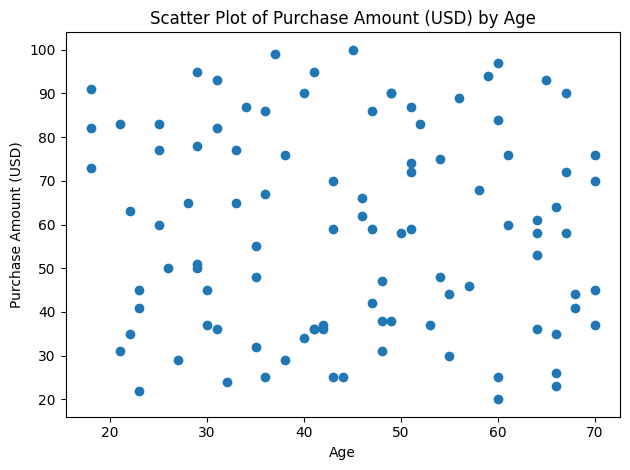

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/shopping_behavior_100 copy.csv')  # Dataset size = 30

# Define variables
dep_var = "Purchase Amount (USD)"
indep_var = "Age"

# Scatter plot: Age vs Purchase Amount
plt.figure()
plt.scatter(df[indep_var], df[dep_var])
plt.title(f"Scatter Plot of {dep_var} by {indep_var}")
plt.xlabel(indep_var)
plt.ylabel(dep_var)
plt.tight_layout()
plt.show()


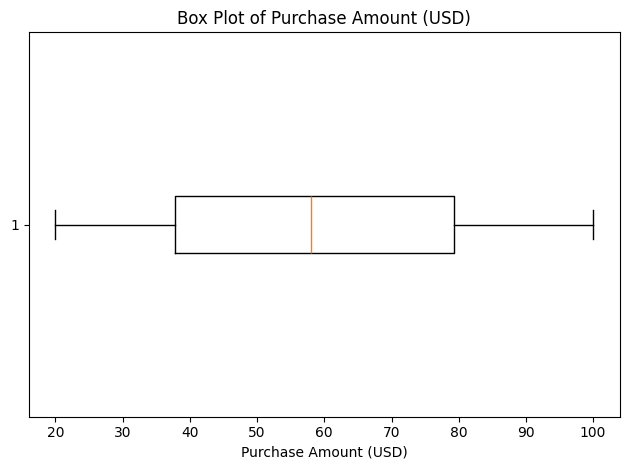

In [12]:
import matplotlib.pyplot as plt
#B. Box Plot

# load the data
df = pd.read_csv('/content/shopping_behavior_NEW.csv') #data size = 1000

#Box plot
plt.figure()
plt.boxplot(df[dep_var].dropna(), vert=False)
plt.title(f"Box Plot of {dep_var}")
plt.xlabel(dep_var)
plt.tight_layout()
plt.show()

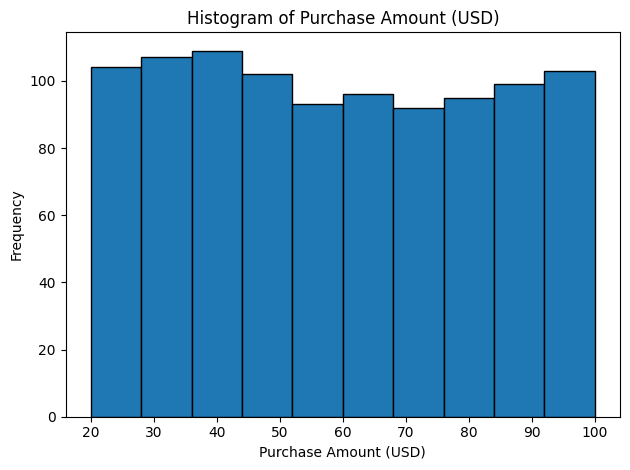

In [13]:
import matplotlib.pyplot as plt
#C. Histogram

# load the data
df = pd.read_csv('/content/shopping_behavior_NEW.csv') #data size = 1000
#Histogram:
plt.figure()
plt.hist(df[dep_var].dropna(), bins=10, edgecolor='black')
plt.title(f"Histogram of {dep_var}")
plt.xlabel(dep_var)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

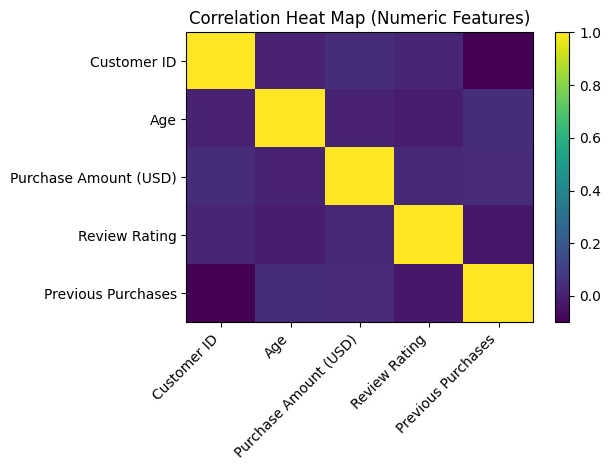

In [14]:
import matplotlib.pyplot as plt
import numpy as np
#D. Heat Map:
num = df.select_dtypes(include=[np.number])
corr = num.corr(numeric_only=True)

plt.figure()
im = plt.imshow(corr, aspect='auto')
plt.title("Correlation Heat Map (Numeric Features)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar(im)
plt.tight_layout()
plt.show()

# **TASK 2: Q7**

In [10]:
import pandas as pd

from scipy.stats import pearsonr, spearmanr, chi2_contingency

import numpy as np



# load the data

df = pd.read_csv('/content/shopping_behavior_NEW.csv')



# - NUMERICAL TESTS:

# Age (independent) vs Purchase Amount (dependent)

x = df['Age']

y = df['Purchase Amount (USD)']



# Pearson test (linear relationship)

pearson_r, pearson_p = pearsonr(x, y)



# Spearman test (rank/monotonic relationship)

spearman_r, spearman_p = spearmanr(x, y)



print("Numerical Correlation Tests: ")

print(f"Pearson Correlation: {pearson_r:.2f}, p-value: {pearson_p:.3f}")

print(f"Spearman Correlation: {spearman_r:.2f}, p-value: {spearman_p:.3f}")



if pearson_p < 0.05:
    print("Pearson: There IS a significant relationship between Age and Purchase Amount.")
else:
    print("Pearson: There is NO significant relationship between Age and Purchase Amount.")



if spearman_p < 0.05:
    print("Spearman: There IS a significant relationship between Age and Purchase Amount.")
else:
    print("Spearman: There is NO significant relationship between Age and Purchase Amount.")



# - CATEGORICAL TEST:

# Gender (independent) vs Purchase Amount level (High/Low)

df['_PurchaseLevel'] = np.where(df['Purchase Amount (USD)'] >= df['Purchase Amount (USD)'].median(), 'High', 'Low')



# Create contingency table

table = pd.crosstab(df['Gender'], df['_PurchaseLevel'])



# Chi-square test

chi2, p_chi, dof, exp = chi2_contingency(table)



print()



print("Categorical Test (Chi-Square): ")

print(f"Chi-square value: {chi2:.2f} | p-value: {p_chi:.3f}")



if p_chi < 0.05:
    print("Chi-Square: There IS a significant relationship between Gender and Purchase Amount.")
else:
    print("Chi-Square: There is NO significant relationship between Gender and Purchase Amount.")

Numerical Correlation Tests: 
Pearson Correlation: 0.01, p-value: 0.741
Spearman Correlation: 0.01, p-value: 0.737
Pearson: There is NO significant relationship between Age and Purchase Amount.
Spearman: There is NO significant relationship between Age and Purchase Amount.

Categorical Test (Chi-Square): 
Chi-square value: 0.22 | p-value: 0.636
Chi-Square: There is NO significant relationship between Gender and Purchase Amount.


# **TASK2: Q8**

In [11]:
# Q8: One-Sample T-Test using population mean from full dataset

import pandas as pd
import numpy as np
from scipy import stats


df = pd.read_csv("shopping_behavior_NEW.csv")

def systematic_sampling(data, step, start=0):
    indices = np.arange(start, len(data), step)
    return data.iloc[indices]

step = 15
start_pos = 3
systematic_sample = systematic_sampling(df, step, start_pos)

# Select dependent variable
dep_var = "Purchase Amount (USD)"

# Population mean from the full dataset
population_mean = df[dep_var].mean()

# Sample values from the systematic sample
sample_values = systematic_sample[dep_var].dropna()

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(sample_values, population_mean)

print("One-Sample T-Test Results")
print("--------------------------")
print(f"Population Mean: {population_mean:.2f}")
print(f"Sample Mean: {sample_values.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Conclusion: The sample mean is significantly different from the population mean.")
    print("The sample may not represent the normal population.")
else:
    print("Conclusion: There is no significant difference between the sample and population mean.")
    print("The sample represents the normal population.")


One-Sample T-Test Results
--------------------------
Population Mean: 58.68
Sample Mean: 56.96
T-statistic: -0.5730
P-value: 0.5686
Conclusion: There is no significant difference between the sample and population mean.
The sample represents the normal population.


# **TASK 3: Q9**

In [ ]:
# Define independent (X) and dependent (Y) variables
X = df.iloc[:,[15]].values         # independent variable (Previous Purchases)
y = df.iloc[:,5].values          # dependent variable (Purchase Amount)

# Split data into train and test sets (80% / 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 6]
 [ 3]
 [31]
 [23]
 [ 7]
 [15]
 [48]
 [19]
 [47]
 [ 3]
 [ 6]
 [21]
 [14]
 [27]
 [36]
 [37]
 [36]
 [ 1]
 [ 1]
 [11]
 [34]
 [46]
 [28]
 [ 3]
 [ 2]
 [ 4]
 [25]
 [29]
 [40]
 [37]
 [48]
 [45]
 [12]
 [31]
 [49]
 [44]
 [ 4]
 [20]
 [30]
 [20]
 [45]
 [40]
 [46]
 [33]
 [ 7]
 [38]
 [11]
 [ 4]
 [20]
 [23]
 [ 2]
 [10]
 [18]
 [31]
 [34]
 [11]
 [32]
 [14]
 [48]
 [38]
 [17]
 [27]
 [45]
 [15]
 [30]
 [26]
 [45]
 [16]
 [ 5]
 [50]
 [16]
 [33]
 [ 7]
 [15]
 [34]
 [34]
 [44]
 [20]
 [15]
 [ 6]]
[[26]
 [26]
 [37]
 [37]
 [23]
 [36]
 [25]
 [18]
 [46]
 [45]
 [16]
 [32]
 [11]
 [24]
 [13]
 [25]
 [50]
 [16]
 [48]
 [31]]
[ 83  48  87  29  38  36  25  75  95  51  41  90  76  38  41  89  70  34
  77  25  23  91  72  50  37  83  90  93  20  62  72  90  35  30  76  74
  60  37  55  44  59  26  22 100  58  93  25  61  60  68  65  31  32  47
  45  90  63  76  46  70  82  78  37  73  58  86  42  86  59  58  50  95
  36  45  59  53  37  97  84  65]
[99 94 67 36 36 66 82 24 87 25 48 83 31 77 35 45 64 29 36 44]


In [30]:
#TASK2 PART-10: Develop a script to forecast the value of the dependent variable from all the relevant independent variables using Multiple Linear Regression

# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

[[26]
 [26]
 [37]
 [37]
 [23]
 [36]
 [25]
 [18]
 [46]
 [45]
 [16]
 [32]
 [11]
 [24]
 [13]
 [25]
 [50]
 [16]
 [48]
 [31]]
[59.64901934 59.64901934 60.72581494 60.72581494 59.35534781 60.62792443
 59.55112883 58.86589527 61.60682953 61.50893902 58.67011425 60.2363624
 58.1806617  59.45323832 58.37644272 59.55112883 61.99839156 58.67011425
 61.80261054 60.13847189]


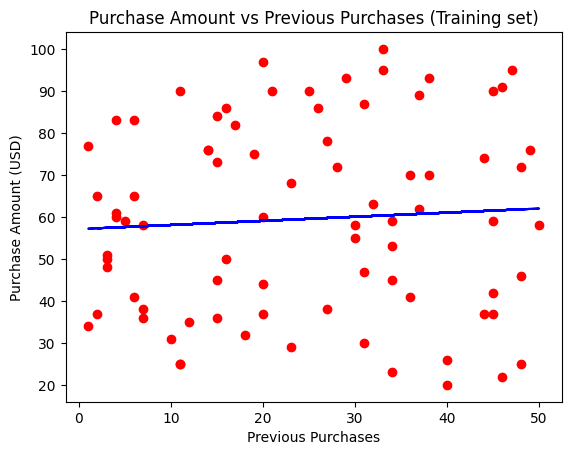

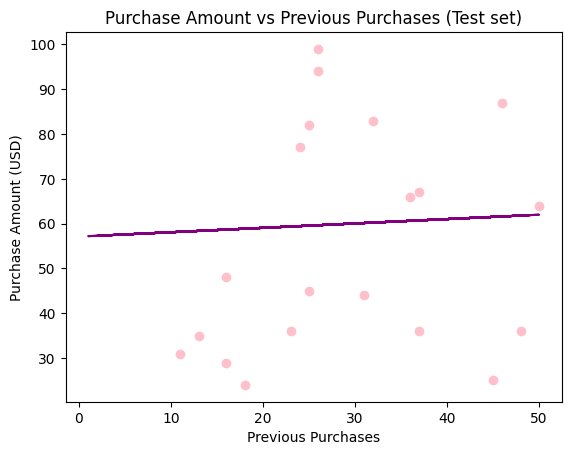

The intercept is: 57.1038660999766
The coefficent is: 0.09789050924120726


-0.018097582101346488

In [ ]:
# Predicting the Test results
y_pred = regressor.predict(X_test)
print(X_test)
print(y_pred)

regressor.predict([[100]])

# Visualize the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Purchase Amount vs Previous Purchases (Training set)')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# Visualizing the Test set results
plt.scatter(X_test, y_test, color = 'pink')
plt.plot(X_train, regressor.predict(X_train), color = 'purple')
plt.title('Purchase Amount vs Previous Purchases (Test set)')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# get the intercept and the coefficent
b0 = regressor.intercept_
b1 = regressor.coef_
print('The intercept is:', b0)
print('The coefficent is:', b1[0])

from sklearn.metrics import r2_score

# model evaluation
r2_score(y_test, y_pred)

# **TASK 3: Q12**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Accuracy: 0.515


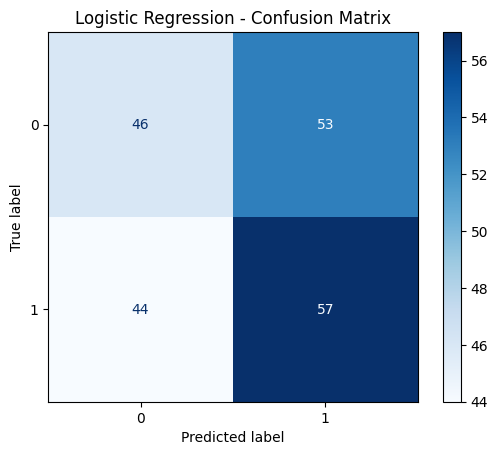


Decision Tree
Accuracy: 0.49


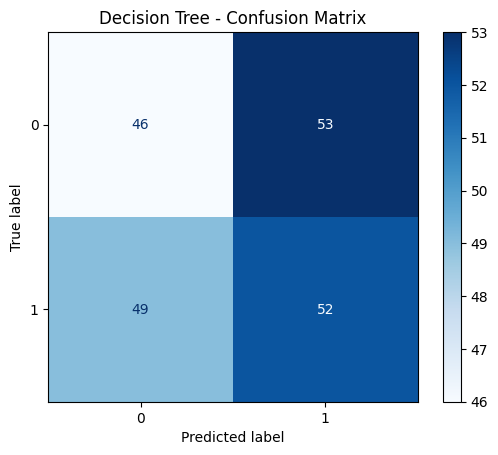


Random Forest
Accuracy: 0.56


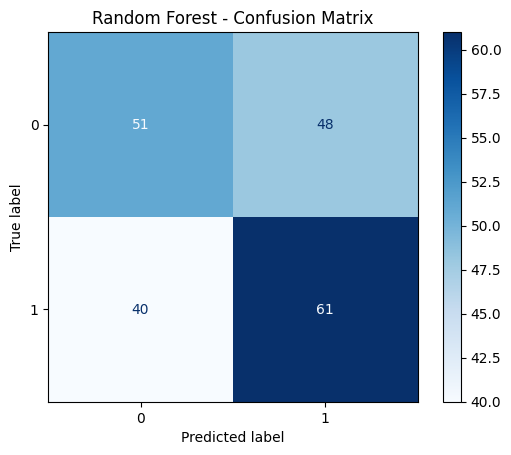


KNN
Accuracy: 0.44


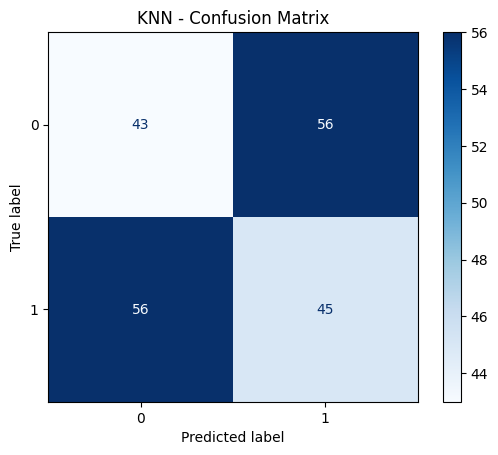


Best Classifier: Random Forest
Accuracy: 0.56


In [15]:
# Step 12: Evaluate Models using Confusion Matrix and Accuracy

# Evaluate models using confusion matrix & accuracy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("shopping_behavior_NEW.csv")

# 2. Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

# 3. Define features (X) and target (y)
# Change the target column name if different in your dataset
target_column = 'Purchase Amount (USD)' # Assuming 'Purchase Amount (USD)' is the target based on previous cells
X = df.drop(columns=[target_column])

# Convert 'Purchase Amount (USD)' into a binary target variable based on the median
median_purchase = df[target_column].median()
y = (df[target_column] >= median_purchase).astype(int) # 1 for high purchase, 0 for low purchase


# 4. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# 6. Evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name}")
    print("Accuracy:", round(acc, 4))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# 7. Identify and display the best model
best_model = max(results, key=results.get)
print("\nBest Classifier:", best_model)
print("Accuracy:", round(results[best_model], 4))

# **TASK 3: Q13**

In [ ]:
#Step 13: Predict using Best-Fit Model (Random Forest)

from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

#Predict on test data
y_pred = best_model.predict(X_test)

#Display sample predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample Predictions:")
print(predictions.head(10))


Sample Predictions:
      Actual  Predicted
839        1          0
1717       0          0
321        1          0
3187       0          0
2269       0          0
366        1          1
2644       0          1
1749       0          1
3605       0          0
1096       0          1


# TASK 3: **Q14**

In [1]:
# Hierarchical (Horizontal) Clustering on the given dataset

import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("shopping_behavior_100 copy.csv")

# Use numeric fields
X_num = df[["Age", "Purchase Amount (USD)"]].dropna()


# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X_num)



# ---- Create clusters (choose k=4 as example) ----
agg = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels = agg.fit_predict(X)


# ---- Scatter plot for Hierarchical clusters ----
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Hierarchical (Agglomerative) Clusters")
plt.xlabel("Age (scaled)")
plt.ylabel("Purchase Amount (scaled)")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'shopping_behavior_100 copy.csv'

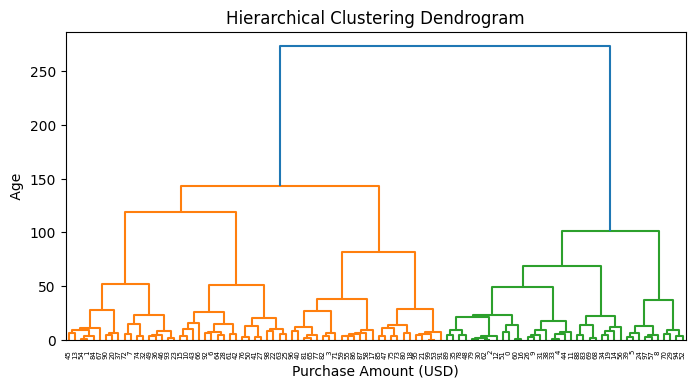

In [6]:
#Hierarchical (Agglomerative) Clustering
import pandas as pd # Import pandas
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("shopping_behavior_100 copy.csv")


#Select numeric fields
cluster_data = df[['Age', 'Purchase Amount (USD)']].dropna()

linked = linkage(cluster_data, method = 'ward')
plt.figure(figsize=(8, 4))
dendrogram(linked, orientation = 'top', distance_sort = 'descending', show_leaf_counts = True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel(" Age ")
plt.show()

# **TASK 3: Q14: Peform K-means for fields from the dataset**

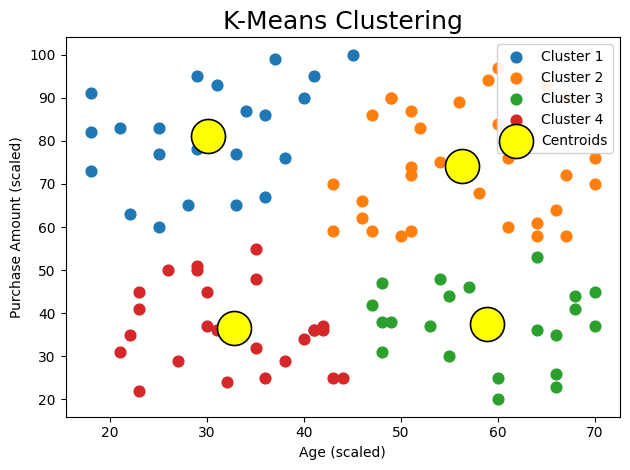

Cluster centroids (original units):
         Age  Purchase Amount (USD)
0  30.130435              81.173913
1  56.290323              74.193548
2  58.857143              37.428571
3  32.720000              36.560000


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ensure df, feature_cols, data, scaler, and X are defined within this cell
df = pd.read_csv("/content/shopping_behavior_100 copy.csv")
feature_cols = ["Age", "Purchase Amount (USD)"]
data = df[feature_cols].dropna().reset_index(drop=True)
scaler = StandardScaler()
X = scaler.fit_transform(data)

k = 4
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10, max_iter=300)
labels = kmeans.fit_predict(X)

clustered = data.copy()
clustered["Cluster"] = labels

plt.figure()
for c in sorted(clustered["Cluster"].unique()):
    plt.scatter(
        clustered.loc[clustered["Cluster"] == c, "Age"],
        clustered.loc[clustered["Cluster"] == c, "Purchase Amount (USD)"],
        s=60,
        label=f"Cluster {c+1}"
    )



centroids_unscaled = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=feature_cols
)

plt.scatter(
    centroids_unscaled[feature_cols[0]],
    centroids_unscaled[feature_cols[1]],
    s=600, c="yellow", edgecolors="black", linewidths=1.2,
    label="Centroids", zorder=5
)

plt.title("K-Means Clustering", fontsize=18)
plt.xlabel("Age (scaled)")
plt.ylabel("Purchase Amount (scaled)")
plt.legend(framealpha=0.9, title=None)
plt.tight_layout()
plt.show()


print("Cluster centroids (original units):")
print(centroids_unscaled)


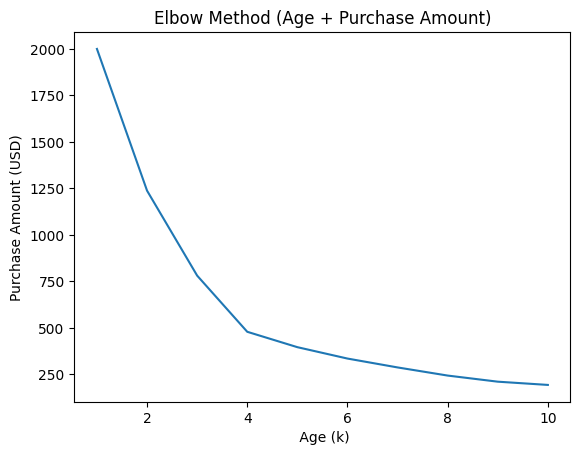

In [4]:
# Using the Elbow method to find the optimal number of clusters:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("shopping_behavior_NEW.csv")


feature_cols = ["Age", "Purchase Amount (USD)"]
data = df[feature_cols].dropna().reset_index(drop=True)

# 3) Scale features for K-Means
scaler = StandardScaler()
X = scaler.fit_transform(data)


wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10, max_iter=300)
    km.fit(X)
    wcss.append(km.inertia_)
plt.figure()

plt.plot(range(1, 11), wcss)

plt.title("Elbow Method (Age + Purchase Amount)")

plt.xlabel(" Age (k)")

plt.ylabel("Purchase Amount (USD)")

plt.show()